In [3]:
# Import necessary libraries
import requests
import time
from datetime import datetime
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# API endpoint for the ISS location
API_URL = "http://api.open-notify.org/iss-now.json"

# Lists to store the data
latitudes = []
longitudes = []
timestamps = []

# Number of data points to collect
num_points = 120 # Collecting a bit more to be safe

print("Starting ISS data collection...")

for i in range(num_points):
    try:
        # Make the API request
        response = requests.get(API_URL)
        # Raise an exception for bad status codes (4xx or 5xx)
        response.raise_for_status()

        # Parse the JSON response
        data = response.json()

        # Extract data
        lat = float(data['iss_position']['latitude'])
        lon = float(data['iss_position']['longitude'])
        ts = int(data['timestamp'])

        # Append data to our lists
        latitudes.append(lat)
        longitudes.append(lon)
        timestamps.append(ts)
        
        # Provide feedback to the user
        human_time = datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
        print(f"Data Point {i+1}/{num_points}: Timestamp: {human_time}, Lat: {lat:.4f}, Lon: {lon:.4f}")

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        # Optionally, you can decide to stop or just skip this point
    
    # Wait for 10 seconds before the next request
    time.sleep(10)

print("\nData collection complete!")
print(f"Total data points collected: {len(latitudes)}")

Starting ISS data collection...
Data Point 1/120: Timestamp: 2025-09-17 13:07:21, Lat: 28.9367, Lon: -68.2649
Data Point 2/120: Timestamp: 2025-09-17 13:07:32, Lat: 28.4563, Lon: -67.7606
Data Point 3/120: Timestamp: 2025-09-17 13:07:49, Lat: 27.6510, Lon: -66.9311
Data Point 4/120: Timestamp: 2025-09-17 13:08:00, Lat: 27.1418, Lon: -66.4165
An error occurred: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x000001C3FF8AB790>, 'Connection to api.open-notify.org timed out. (connect timeout=None)'))
Data Point 6/120: Timestamp: 2025-09-17 13:08:43, Lat: 25.1542, Lon: -64.4750
Data Point 7/120: Timestamp: 2025-09-17 13:08:54, Lat: 24.6113, Lon: -63.9618
Data Point 8/120: Timestamp: 2025-09-17 13:09:04, Lat: 24.1374, Lon: -63.5194
Data Point 9/120: Timestamp: 2025-09-17 13:09:15, Lat: 23.6383, Lon: -63.0589
Data Point 10/120: Timestamp: 2025-09-17 13:09:25, Lat

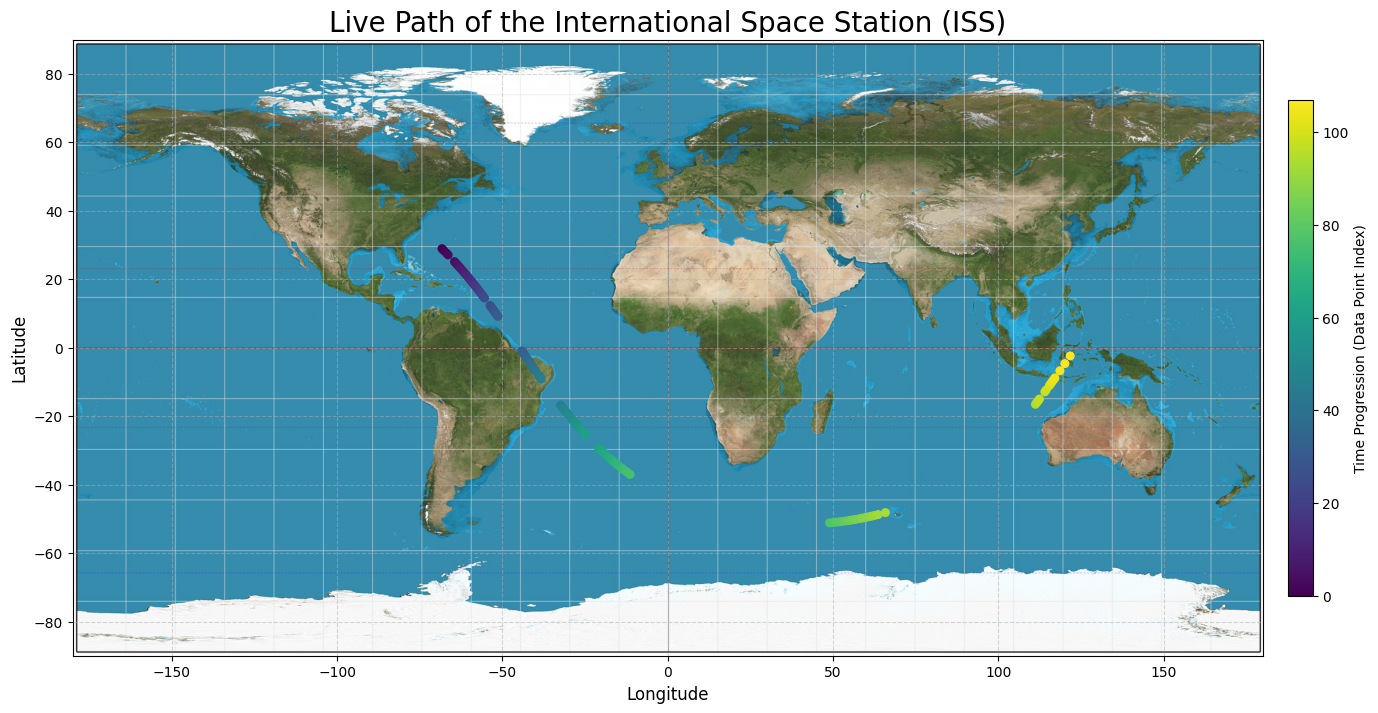

In [5]:
# Load the world map image
try:
    img = plt.imread("map.jpg")
except FileNotFoundError:
    print("Error: 'map.jpg' not found. Please download the map image and place it in the same directory.")
    # Create a blank plot if the map is not found
    img = None

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

if img is not None:
    # Display the map image as the background
    # The extent defines the coordinates of the image corners: [min_lon, max_lon, min_lat, max_lat]
    ax.imshow(img, extent=[-180, 180, -90, 90], aspect='auto')

# Plot the ISS path using a scatter plot
# The 'c' argument colors the points based on their index, showing the path's direction over time
# The 'cmap' argument sets the color scheme
scatter = ax.scatter(longitudes, latitudes, s=30, c=range(len(latitudes)), cmap='viridis', zorder=10)

# Customize the plot
ax.set_title('Live Path of the International Space Station (ISS)', fontsize=20)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.grid(True, linestyle='--', alpha=0.5)

# Add a color bar to indicate time progression
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('Time Progression (Data Point Index)')

# Show the plot
plt.show()